# PUBG Game Winner Prediction

This notebook walks through:
- **Data loading & exploration**  
- **Visualization of key features**  
- **Preprocessing for modeling**  
- **Training and evaluating regression models**  
- **Comparing results and feature importance**  


In [1]:
# Import all necessary libraries for data handling, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
# Load the PUBG match data into a DataFrame
# Replace the path below with the location of your extracted CSV file
data_path = r"D:\Users\Farhan\Desktop\Projects\PRCP-1012-GameWinnerPred\Data\pubg.csv"
# Alternative: data_path = 'D:/Users/farha/Downloads/…/pubg.csv'
df = pd.read_csv(data_path)

# Drop any rows where the target is missing
df.dropna(subset=['winPlacePerc'], inplace=True)

df.head()


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
# Quick overview: shape, dtypes, missing-value counts, basic stats
print("Dataset shape:", df.shape)
print("\nColumn info:")
print(df.info())
print("\nTop 10 columns with missing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))
print("\nDescriptive statistics:")
print(df.describe())


Dataset shape: (4446965, 29)

Column info:
<class 'pandas.core.frame.DataFrame'>
Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weap

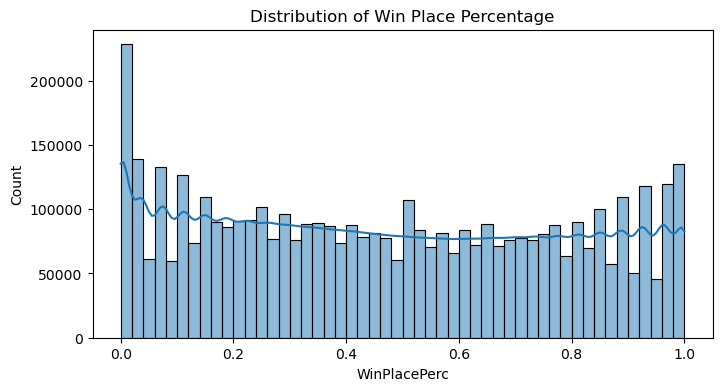

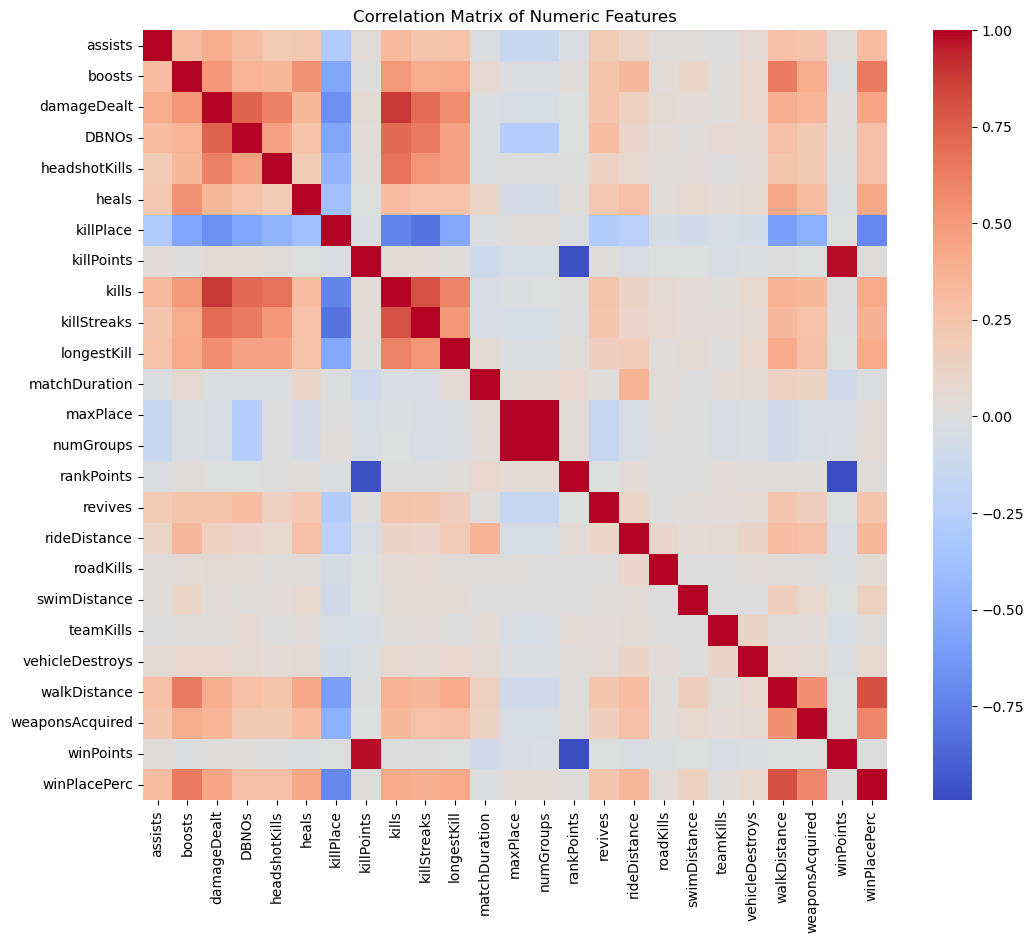

In [4]:
# Visualize the distribution of the target 'winPlacePerc'
plt.figure(figsize=(8, 4))
sns.histplot(df['winPlacePerc'], bins=50, kde=True)
plt.title('Distribution of Win Place Percentage')
plt.xlabel('WinPlacePerc')
plt.ylabel('Count')
plt.show()

# Plot correlation heatmap of numeric features
numeric_corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [5]:
# Prepare features (X) and target (y) for modeling
X = df.drop(columns=['Id', 'groupId', 'matchId', 'winPlacePerc'])
y = df['winPlacePerc']

# One-hot encode the 'matchType' categorical column
X = pd.get_dummies(X, columns=['matchType'], drop_first=True)

# Fill any remaining missing feature values with zero
X.fillna(0, inplace=True)


In [6]:
# Split the data into training and test sets for unbiased evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print("Training set shape:", X_train.shape)
print("Test set shape:    ", X_test.shape)


Training set shape: (3557572, 39)
Test set shape:     (889393, 39)


In [7]:
# Train two regression models, with a faster Random Forest configuration
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(
        n_estimators=50,    # fewer trees for speed
        max_depth=10,       # limit depth for faster training
        n_jobs=-1,          # utilize all CPU cores
        random_state=42
    )
}
performance = []

for name, model in models.items():
    print(f"\nTraining {name}…")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae  = mean_absolute_error(y_test, preds)
    print(f"{name} → RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    performance.append((name, rmse, mae))



Training LinearRegression…
LinearRegression → RMSE: 0.1229, MAE: 0.0899

Training RandomForestRegressor…
RandomForestRegressor → RMSE: 0.0962, MAE: 0.0679


In [8]:
# Compile and display a comparison table of model performance
results_df = pd.DataFrame(performance, columns=['Model', 'RMSE', 'MAE'])
results_df


,Model,RMSE,MAE
0,LinearRegression,0.122927,0.089893
1,RandomForestRegressor,0.096218,0.067850


In [9]:
# Examine the top 10 most important features according to the Random Forest
rf = models['RandomForestRegressor']
importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)
feat_imp.head(10)


,feature,importance
21,walkDistance,0.763476
6,killPlace,0.186481
13,numGroups,0.009674
11,matchDuration,0.008940
12,maxPlace,0.008450
8,kills,0.006134
9,killStreaks,0.004319
16,rideDistance,0.003515
3,DBNOs,0.003364
1,boosts,0.003280


## Conclusions & Next Steps

- **Best model**: choose the one with lowest RMSE from the comparison table  
- **Key challenges** encountered:
  - Handling of missing values  
  - Skewed target distribution  
  - High feature dimensionality after encoding  
  - Training time on large data  

**Next steps** could include:
- Feature engineering (e.g., interaction terms, aggregations)  
- Hyperparameter tuning (GridSearchCV)  
- Trying other algorithms (e.g., XGBoost, LightGBM)  
- Cross-validation for more robust estimates  
